# Project B: Quantum Relay

Marcus Clark, QE-CDT, the University of Bristol.

### Introduction

A Quantum Repeater is a system where the entanglement between two pairs of photons are swapped, entangling the most distant photons

Below is schematic of a Quantum Repeater that shows how the sources and users are distributed: 

![title](Figures/Repeater_full_system.png)
Figure 1

There are two types of Quantum Repeaters;
- with quantum memory,
- without quantum memory (Quantum Relay).

I will be discussing a Quantum Relay system

<br>

### The Reason For The Project

It is inevitable that a Quantum Relay will be developed for the UK Quantum Network.

This means that the resources required to construct it need analysis.

Here i will be simulating the system such that we can decide which laser properties, hence which laser is required for this system.

I will be overestimating the error, specifically carrying forward the Possonian fluctuation as an actual error and not just the fluctuation in in signal.

### The Qunatum relay

The Quantum Relay is based on the Hong–Ou–Mandel (HOM) effect.

The probability of two photons interfeering, and therefor becoming entanglend, is given by:

\begin{align}
     P_c = \frac{1}{2} ( 1 - \exp(-\frac{1}{2} \Delta z^2 (c  \times t_{cw})^2)  \exp(-\frac{1}{2} (\Delta \Omega \times t_{cw})^2)), \tag{1}\\
\end{align}

where $\Delta z$ is the path length difference, $t_{cw}$ is the coincidence window, and $\Delta \Omega$ is the frequency difference between the photons, as shown by <a href="https://iopscience.iop.org/article/10.1088/0953-4075/39/18/R01" target="_blank">Wang, K</a>. 

<br>

This however isn't particularly useful experimentally. 

If we are to use this, we would be relying on an absence of coincidences to confirm that the entanglement was swapped. 

This heavily reduces the ability to confirm that the photons that both Alice and Bob received are entagled.

<br>

### Relay Setup

To get a useful output from this system is a simple alteration that can be implimented.

This is to take the bunched outputs and put those into another beam splitter

![title](Figures/Entanglement_Swapping_20200506.png)
Figure 2

This will give a 0.5 probability that the bunched photons are then antibunched giving a positive signal.

So taking Equation 1, the probability of measuring a coincidence with one extra beam splitter is;

\begin{align}
     P_{c2} = \frac{1}{2} \times \frac{1}{2} ( 1 - P_c). \tag{2}\\
\end{align}

The first $\frac{1}{2}$ comes from measuring only one of the two outputs, 
and the other comes from the probability of a bunched pair then becoming anti-bunched.

<br>

### The Detector Setup

This then becomes a limit of available technology.

If the Relay has access to *only* 2 detectors then this is the best signal that can be seen.

If the Relay has access to 4 detectors then this signal can use both of the bunched outputs, as shown in the figure above.

This would take Equations 1 and 2, and become;

\begin{align}
     P_{c3} = \frac{1}{4} ( 1 + \exp(-\frac{1}{2} \Delta z^2 (c  \times t_{cw})^2)  \exp(-\frac{1}{2} (\Delta \Omega \times t_{cw})^2)). \tag{3}\\
\end{align}

This then produces a Coincidence Probability of the form below;

![title](Figures/HomPeakPlot.png)
Figure 3

### The Sources

Now that the Swapping rate can be calculated, the rate of pairs at the sources need to be sorted.

For this type of system Pulsed sources are the most common, as they pulse production syncronisation allows for efficient arrival syncronisation at the relay.

Each source has the following parameters;

- a entangled pair count,
- a heralding efficiency,
- central ferquencies and frequency bandwidths for each output,
- pulse widths,
- pulse rates,
- singles caused by other factors.

The pair count is the rate at which entangled pairs are generated within a Spontaneous Parametric Down Conversion (SPDC) based source. 

Here we are genearting wavelength sepearated pairs, such that they can be sent to the correct user by multiplexing.

The Join Spectral Amplitude (JSA) of two such source, with different pulse properties, is shown below;



![title](JSAData/PulsedLaserJSA/Tsunami_JSA.png) | ![title](JSAData/PulsedLaserJSA/Katana_JSA.png)
- | -
1(A) | 1(B)
Figure 4

Figure A shows the JSA for a laser with a $100fs$ pulse width and a $15nm$ bandwidth.

Figure B shows the JSA for a laser with a $35ps$ pulse width and a $0.5nm$ bandwidth.

This shows the probabiliy of photons that are entangled with the wrong channel being sent to the wrong user. This is the heralding efficiency.

<nb>

To separate these photons to users Wavelength Division Multiplexing (WDM) is used, and the spectrum is sepearted according to <a href="https://www.fiberdyne.com/products/itu-grid.html" target="_blank">ITU channels</a>.

This cuts these Signal and Idler sepctrum into $100$GHz slices, around $1550.12$nm.

The channel at $1550.12$nm is labeles ITU channel 34.

The below figure shows how the probability of swapping changes, as calculated with Equation 3 in dB, as the ITU channel of one of the relay inputs is changed, as a function of the path difference;


![title](Figures/Figure_Heatmap_ITUchannelVSPathDifference_dB_cut.png)
Figure 5

### Transmission

A main factor in calculating the rate at which swapping happens is the loss in the transmition to the Relay.

There is an inherent loss in the fibre, such that the probability of transmission is;

\begin{align}
     P_{fibre} = \eta^n \times 10^{-\frac{\alpha d}{10}}, \tag{4}\\
\end{align}

where $\alpha = 0.3$dB/km is the transmission coefficient, $d$ is the fibre distance in km, $\eta$ is the detector efficiency, and $n$ is the number of detectors.

The probability of an coincidence being measured if given by;

\begin{align}
     P_{total} = P_{coincidence} \times P_{fibre}, \tag{5}\\
\end{align}

where $P_{coincidence}$ is given in Equation 3.

There is also dispersion jitter that is assosicted with the fibre links, but in this system the difference between dispersion included and dispersion excluded that it will not be explicitly stated where it is in the calculations. 

This is due to dispersion compensation in the fibre networks that are used, so the dispersion coefficient is $18$ ps/(nm km)

### Synchronisation

The pulses produced by the source are synchronised.

The value of the Synchronisation Jitter changes the probability of the Relay measuring coincidences. 

This Jitter is essentially how much the pulse position can be different from their expected position. 

This changes the overlapping of the pulses in the beam splitter, reducing the probability of a swap occuring.

This also adds further noise on the swaps.

### Full Relay Signal

This signal is then calcuated with both Equation 5 and this overlap probability. This is given by;

\begin{align}
     P_{swap\_signal} = P_{total} \times P_{pulse\_overlap}. \tag{6}\\
\end{align}


The Noise on the Relay is a sum of the Possonian noise, the Accidentals, and the Sync Jitter error;

\begin{align}
    P_{swap\_noise} = \sqrt{P_{swap\_signal}} + E_{jitter} + E_{accidentals}. \tag{7}\\
\end{align}

In Equation 7;

\begin{align}
    E_{accidentals} = P_{coincidence} \times Singles_{AR} \times Singles_{BR} \times t_{cw}, \tag{8} \\
\end{align}

where $Singles_{AR}$ are the singles received by the Relay that come from Source 1, and $Singles_{BR}$ are the singles received by the Relay that come from Source 2.

In Equation 7;

\begin{align}
    E_{jitter} = T \times E, \tag{9} \\
\end{align}

is the error from the synchronisation jitter.

The values in Equation 9 are calculated from;

\begin{align}
    T = \frac{P_{swap\_signal} + \sqrt{P_{swap\_signal}} + E_{accidentals}}{1 - E}, \tag{10} \\
\end{align}

where $T$ is the total signal and noise at the repeater, and $E$ is the ratio of the total signal and error to the error assosiated with the synchronisation jitter.

The Possonian error is essentially the fluctuation in the true signal. 

### The Users

The two users, Alice (A) and Bob (B), in a Quantum Relay system each receive the other signal from the two sources. 

They measure the coincidences betwen their photons as if nothing has changed in the QKD protocol. 

The only change is that they refer to a Four-Fold coincidence to see if they were successful, rather than the normal Two-Fold coincidence. 

This Four-Fold coincidence rate is calculated by;

\begin{align}
    FF_{signal} = P_{swap\_signal} \times Signal_{A} \times Signal_{B} \times P_{pulse\_overlap}, \tag{11} \\
\end{align}

where $Signal_{user}$ is the rate at which the photons from the pairs arrive at the user, and $P_{pulse\_overlap}$ is the probability of the pulses being seen as a coincidence at the users.

There are several further errors in the Four-Fold. These are;

- a true coincidence between A and B with a false swap;

\begin{align}
    FF_{trueAB\_falseSwap} = P_{swap\_noise} \times Signal_{A} \times Signal_{B} \times P_{pulse\_overlap}, \tag{12} \\
\end{align}

- an accidental between A and B with a true swap;

\begin{align}
    FF_{accAB\_trueSwap} = P_{swap\_signal} \times Singles_{A} \times Singles_{B} \times (t_{cw})^2, \tag{13} \\
\end{align}

- an accidental between A and B with a false swap;

\begin{align}
    FF_{accAB\_trueSwap} = P_{swap\_noise} \times Singles_{A} \times Singles_{B} \times (t_{cw})^2, \tag{14} \\
\end{align}

- and the possonian noise on the Four-Fold signal;

\begin{align}
    FF_{possonian} = \sqrt{FF_{signal}}. \tag{15} \\
\end{align}

This makes the Four-Fold noise;

\begin{align}
    FF_{noise} = FF_{trueAB\_falseSwap} + FF_{accAB\_trueSwap} + FF_{accAB\_trueSwap} + FF_{possonian}. \tag{16} \\
\end{align}


### QBER Estimate

The Quantum Bit Error Rate is the proportion of error to the key rate.

For any QKD system there is a maximum QBER that if exceded QKD cannot be preformed, and this is about a QBER of 0.1. 

As this simulation does not calculate the Key Rates the QBER can only be estimated. 

This estimate is calculated by;

\begin{align}
    QBER = \frac{Noise_{without\_possonian}}{Signal - Noise_{possonian\_fluctiation}}. \tag{17} \\
\end{align}

# Here the pulse statistics for the source of an Quantum Relay  system will be analysed.

### This will feed into the decision on which laser to use in the experimental setup

There are the required imports and definitions for the analysis:

In [1]:
import time
from datetime import date
from datetime import datetime
from Classes import *
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.mlab as mlab
from IPython.display import display, Math, Latex
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.integrate as integrate
plusminus = u'\u00b1'

def Freq2Wave(Freq_bw_Hz,central_wavelength_nm):
    c = 299792458 
    central_wavelength = central_wavelength_nm*1E-9
    Freq_bw = Freq_bw_Hz
    Wave_bw = (Freq_bw*(central_wavelength**2))/c
    return Wave_bw
    
def Wave2Freg(Wave_bw_nm,central_wavelength_nm):
    c = 299792458
    central_wavelength = central_wavelength_nm*1E-9
    Wave_bw = Wave_bw_nm*1E-9
    Ferq_bw = (c*Wave_bw)/(central_wavelength**2)
    return Freq_bw

lasers = {"Tsunami":[0.1,0.004E-12,1E-12],"Katana":[35,1E-12,1E-9]}

## For the 100 fp pulsed laser (Taitanium-Saphire Tsunami):

In [2]:
S1_100fs  = Source(pair_count=1E6, frequency1_THz=193.4, frequency2_THz=193.4, pulse_width_ps=0.1, 
             pulse_rate_MHz=2, singles_fluorescence = 3000, dark_counts = 1000, afterpulsing = 0.15,
             channel_isolation = 500, DWDM_coupling_loss = 0.35)

S2_100fs  = Source(pair_count=1E6, frequency1_THz=193.4,  frequency2_THz=193.4,  pulse_width_ps=0.1, 
             pulse_rate_MHz=2, singles_fluorescence = 3000, dark_counts = 1000, afterpulsing = 0.15,
             channel_isolation = 500, DWDM_coupling_loss = 0.35)

LA1_100fs = Link(Length=25, Loss=0.3, ITU_bandwidth_Hz = 100*1E9, peak_wavelength_nm=1550.12,
             dispersion_coef=18, fibre_coupling_loss=0.08)

LR1_100fs = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
             dispersion_coef=18, fibre_coupling_loss=0.08)

LB2_100fs = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
             dispersion_coef=18, fibre_coupling_loss=0.08)

LR2_100fs = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
             dispersion_coef=18, fibre_coupling_loss=0.08)

UA_100fs  = User(Link = LA1_100fs, Source = S1_100fs)

UB_100fs  = User(Link = LB2_100fs,  Source = S2_100fs)

Sy_100fs  = Sync(Source1 = S1_100fs, Link1 = LR1_100fs, Source2 = S2_100fs, Link2 = LR2_100fs, 
             coincidence_window = 150E-12, sync_jitter = 0.004E-12)

R_100fs   = Repeater(UA_100fs,UB_100fs,S1_100fs,S2_100fs,LA1_100fs,LR1_100fs,LB2_100fs,LR2_100fs,Sy_100fs)
TP_100fs  = TwoPartyQKD(R_100fs)

## For the 35ps pulsed laser (Katana):

In [3]:
S1_35ps  = Source(pair_count=1E6, frequency1_THz=193.4, frequency2_THz=193.4, pulse_width_ps=35, 
             pulse_rate_MHz=2, singles_fluorescence = 3000, dark_counts = 1000, afterpulsing = 0.15,
             channel_isolation = 500, DWDM_coupling_loss = 0.35)

S2_35ps  = Source(pair_count=1E6, frequency1_THz=193.4,  frequency2_THz=193.4,  pulse_width_ps=35, 
             pulse_rate_MHz=2, singles_fluorescence = 3000, dark_counts = 1000, afterpulsing = 0.15,
             channel_isolation = 500, DWDM_coupling_loss = 0.35)

LA1_35ps = Link(Length=25, Loss=0.3, ITU_bandwidth_Hz = 100*1E9, peak_wavelength_nm=1550.12,
           dispersion_coef=18, fibre_coupling_loss=0.08)

LR1_35ps = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
           dispersion_coef=18, fibre_coupling_loss=0.08)

LB2_35ps = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
           dispersion_coef=18, fibre_coupling_loss=0.08)

LR2_35ps = Link(Length = 25, Loss=0.3, ITU_bandwidth_Hz = 100*10E9, peak_wavelength_nm=1550.12,
           dispersion_coef=18, fibre_coupling_loss=0.08)

UA_35ps  = User(Link = LA1_35ps, Source = S1_35ps)

UB_35ps  = User(Link = LB2_35ps,  Source = S2_35ps)

Sy_35ps  = Sync(Source1 = S1_35ps, Link1 = LR1_35ps, Source2 = S2_35ps, Link2 = LR2_35ps, 
           coincidence_window = 150E-12, sync_jitter = 2.5E-12)

R_35ps   = Repeater(UA_35ps,UB_35ps,S1_35ps,S2_35ps,LA1_35ps,LR1_35ps,LB2_35ps,LR2_35ps,Sy_35ps)
TP_35ps  = TwoPartyQKD(R_35ps)

## To calculate the Four-Fold data for both systems

In [4]:
print("For Tsunami Laser:")
print("")

print("Alice Signal:            ",R_100fs.SignalA(), "1/s")
print("Bob Signal:              ",R_100fs.SignalB(), "1/s")
print("Alice Singles:           ",R_100fs.SinglesA(), "1/s")
print("Bob Singles:             ",R_100fs.SinglesB(), "1/s")
print("Repeater Signal with A:  ",R_100fs.SignalAR(), "1/s")
print("Repeater Signal with B:  ",R_100fs.SignalBR(), "1/s")
print("Repeater Singals with A: ",R_100fs.SinglesAR(), "1/s")
print("Repeater Singals with B: ",R_100fs.SinglesBR(), "1/s")
print("Swap Signal (disp):      ",R_100fs.SwapSignal(minimum_coincidence = False, just_pc = False,dispersion=True), "1/s")
print("Swap Signal (no disp):   ",R_100fs.SwapSignal(minimum_coincidence = False, just_pc = False,dispersion=False), "1/s")
print("Swap Possonian Noise:    ",R_100fs.SwapNoise(), "1/s")
print("Error from Sync Jitter:  ",R_100fs.JitterError(byX=False, minmax=1E-12), "1/s")
print("Accidentals:             ",R_100fs.Accidentals(minimum_coincidence = False), "1/s")
Signal, Noise = R_100fs.FullBSMSignalAndNoise(minmax=1E-12)
print(" ")
print("Repeater Swapping Rate = ", Signal, plusminus,Noise,"1/s")
print(" ")

FFSig, FFNoi = TP_100fs.FourFold_full(minmax=1E-12)
print("Four-fold coincidences:       ", FFSig,plusminus,FFNoi, "1/s" )
print("Four-fold Noise from QR:      ", TP_100fs.FourFold_trueAB_falseQR(minmax=1E-12), "1/s")
print("Four-Fold Accidentals (true): ", TP_100fs.FourFold_accidentals_trueswap(), "1/s")
print("Four-Fold Accidentals (fasle):", TP_100fs.FourFold_accidentals_falseswap(), "1/s")

print("Four-Fold Possonian:          ", TP_100fs.FourFold_possonian(), "1/s")

print("QBER extimate (from code):    ", TP_100fs.QBER_estimate(minmax=1E-12) )

print("")
print("")
print("For Katana Laser:")
print("")

print("Alice Signal:            ",R_35ps.SignalA(), "1/s")
print("Bob Signal:              ",R_35ps.SignalB(), "1/s")
print("Alice Singles:           ",R_35ps.SinglesA(), "1/s")
print("Bob Singles:             ",R_35ps.SinglesB(), "1/s")
print("Repeater Signal with A:  ",R_35ps.SignalAR(), "1/s")
print("Repeater Signal with B:  ",R_35ps.SignalBR(), "1/s")
print("Repeater Singals with A: ",R_35ps.SinglesAR(), "1/s")
print("Repeater Singals with B: ",R_35ps.SinglesBR(), "1/s")
print("Swap Signal (disp):      ",R_35ps.SwapSignal(minimum_coincidence = False, just_pc = False,dispersion=True), "1/s")
print("Swap Signal (no disp):   ",R_35ps.SwapSignal(minimum_coincidence = False, just_pc = False,dispersion=False), "1/s")
print("Swap Possonian Noise:    ",R_35ps.SwapNoise(), "1/s")
print("Error from Sync Jitter:  ",R_35ps.JitterError(byX=False, minmax=1E-9), "1/s")
print("Accidentals:             ",R_35ps.Accidentals(minimum_coincidence = False), "1/s")
Signal, Noise = R_35ps.FullBSMSignalAndNoise(minmax=1E-9)
print(" ")
print("Repeater Swapping Rate = ", Signal, plusminus,Noise,"1/s")
print(" ")

FFSig, FFNoi = TP_35ps.FourFold_full(minmax=1E-9)
print("Four-fold coincidences:       ", FFSig,plusminus,FFNoi, "1/s" )
print("Four-fold Noise from QR:      ", TP_35ps.FourFold_trueAB_falseQR(minmax=1E-9), "1/s")
print("Four-Fold Accidentals (true): ", TP_35ps.FourFold_accidentals_trueswap(), "1/s")
print("Four-Fold Accidentals (fasle):", TP_35ps.FourFold_accidentals_falseswap(), "1/s")

print("Four-Fold Possonian:          ", TP_35ps.FourFold_possonian(), "1/s")

print("QBER extimate (from code):    ", TP_35ps.QBER_estimate(minmax=1E-9) )

For Tsunami Laser:

Alice Signal:             97094.05578812519 1/s
Bob Signal:               97094.05578812519 1/s
Alice Singles:            150156.9553037185 1/s
Bob Singles:              150156.9553037185 1/s
Repeater Signal with A:   97094.05578812519 1/s
Repeater Signal with B:   97094.05578812519 1/s
Repeater Singals with A:  150156.9553037185 1/s
Repeater Singals with B:  150156.9553037185 1/s
Swap Signal (disp):       4855.18825968504 1/s
Swap Signal (no disp):    4855.18825968504 1/s
Swap Possonian Noise:     69.67918096307562 1/s
Error from Sync Jitter:   15.790238002696663 1/s
Accidentals:              1.691033341956219 1/s
 
Repeater Swapping Rate =  4855.18825968504 ± 87.1604523077285 1/s
 
Four-fold coincidences:        101.42633273416884 ± 12.162769981848411 1/s
Four-fold Noise from QR:       1.8208078789508788 1/s
Four-Fold Accidentals (true):  2.4630855685805372e-06 1/s
Four-Fold Accidentals (fasle): 8.578781290822855e-10 1/s
Four-Fold Possonian:           10.341959638

## The plot of the pulses with respect to the Sync Jitter seperation:

In [5]:
xA_100fs, yA_100fs, xB_100fs, yB_100fs = TP_100fs.PulseShape(Plot=True, AandB=True, preciseness=10000,  dispersion=True, minmax=1E-12)
xA_35ps, yA_35ps, xB_35ps, yB_35ps = TP_35ps.PulseShape(Plot=True, AandB=True, preciseness=10000,  dispersion=True, minmax=1E-9)

x_100fs, y_100fs, na, na = Sy_100fs.ArrivalProbabilityatBSMInput(Plot=True,Rate=False,preciseness=10000,dif = 100,dispersion=True,minmax=1E-12)
x_35ps, y_35ps, na, na = Sy_35ps.ArrivalProbabilityatBSMInput(Plot=True,Rate=False,preciseness=10000,dif = 100,dispersion=True,minmax=1E-9)

This shows how the pulses overlap in the Qunatum Relay as a function of time.

The shaded green area is the overlap, which is the part of the pulses that interfer causing the entanglement to swap

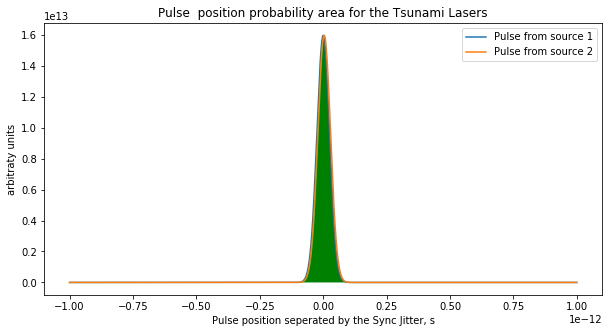

In [6]:
plt.figure(figsize=[10,5])
plt.title("Pulse  position probability area for the Tsunami Lasers")
plt.xlabel("Pulse position seperated by the Sync Jitter, s")
plt.ylabel("arbitraty units")
plt.plot(xA_100fs,yA_100fs,label="Pulse from source 1")
plt.plot(xB_100fs,yB_100fs,label="Pulse from source 2")
plt.fill(x_100fs,y_100fs,"green")
plt.legend()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Tsunami_Pulses.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101107_Tsunami_Pulses.png)

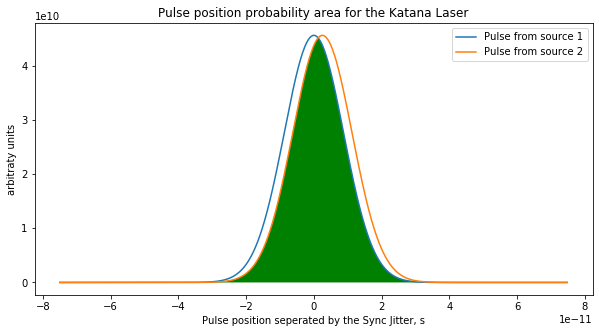

In [7]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.title("Pulse position probability area for the Katana Laser")
plt.xlabel("Pulse position seperated by the Sync Jitter, s")
plt.ylabel("arbitraty units")
plt.plot(xA_35ps,yA_35ps,label="Pulse from source 1")
plt.plot(xB_35ps,yB_35ps,label="Pulse from source 2")
plt.fill(x_35ps,y_35ps,"green")
plt.legend()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Katana_Pulses.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101107_Katana_Pulses.png)

## To plot the Noise assosiated to the Sync Jitter as a function of the Sync Jitter

In [8]:
tss = []
JRss1 = []
JRss2 = []

widths = [0.1,35]
width = widths[0]
JRs1 = []
JRs2 = []
ts = []
for t in np.linspace(0,50*1E-3,10):
    #print(width)
    S1  = Source(10**6,193.4,193.4, pulse_width_ps=0.1, pulse_rate_MHz=2)
    S2  = Source(10**6,193.4,193.4, pulse_width_ps=0.1, pulse_rate_MHz=2)
    LA1 = Link(25)
    LR1 = Link(25)
    LB2 = Link(25)
    LR2 = Link(25)
    UA  = User(LA1,S1)
    UB  = User(LB2,S2)
    Sy  = Sync(S1,LR1,S2,LR2, sync_jitter = t*1E-12)
    R   = Repeater(UA,UB,S1,S2,LA1,LR1,LB2,LR2,Sy)

    
    JR1 = R.JitterError(byX=False,Output_T=False,minmax=1E-12)
    JRs1.append(JR1)
    JR2 = R.JitterError(byX=False,Output_T=True,minmax=1E-12)
    JRs2.append(JR2)
    ts.append(t)

JRss1.append(JRs1)
JRss2.append(JRs2)
tss.append(ts)

width = widths[1]
JRs1 = []
JRs2 = []
ts = []
for t in np.linspace(0,20000*1E-3,10):
    #print(width)
    S1  = Source(10**6,193.4,193.4, pulse_width_ps=35, pulse_rate_MHz=2)
    S2  = Source(10**6,193.4,193.4, pulse_width_ps=35, pulse_rate_MHz=2)
    LA1 = Link(25)
    LR1 = Link(25)
    LB2 = Link(25)
    LR2 = Link(25)
    UA  = User(LA1,S1)
    UB  = User(LB2,S2)
    Sy  = Sync(S1,LR1,S2,LR2, sync_jitter = t*1E-12)
    R   = Repeater(UA,UB,S1,S2,LA1,LR1,LB2,LR2,Sy)

    
    JR1 = R.JitterError(byX=False,Output_T=False,minmax=1E-9)
    JRs1.append(JR1)
    JR2 = R.JitterError(byX=False,Output_T=True,minmax=1E-9)
    JRs2.append(JR2)
    ts.append(t)

JRss1.append(JRs1)
JRss2.append(JRs2)
tss.append(ts)

This is the proportion of the Sync Jitter Error to the total signal and error as seen in the equation,

$Total = \frac{Signal + Noise + Accidentals}{1 - Error}$,

where $Error$ is the proportion of the total signal and Noise that the Sync Jitter Error is.

Below is the value of $Error$:

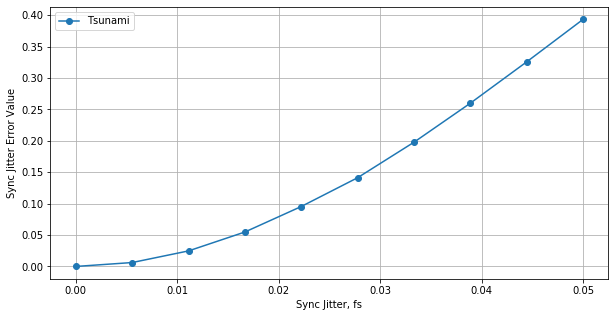

In [9]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.plot(tss[0],JRss1[0],"o-",label="Tsunami")
plt.xlabel("Sync Jitter, fs")
plt.ylabel("Sync Jitter Error Value")
plt.grid()
plt.legend()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Tsunami_SJvSE.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101114_Tsunami_SJvSE.png)

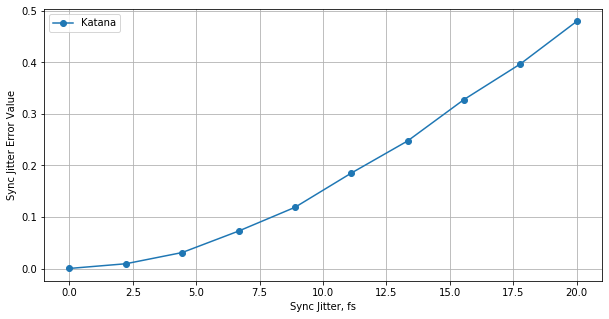

In [10]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.plot(tss[1],JRss1[1],"o-",label="Katana")
plt.xlabel("Sync Jitter, fs")
plt.ylabel("Sync Jitter Error Value")
plt.grid()
plt.legend()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Katana_SJvSE.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101114_Katana_SJvSE.png)

Below is the value $Total \times Error$ from the above equation:

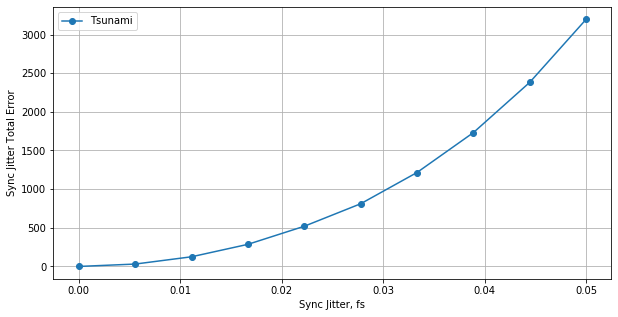

In [11]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.plot(tss[0],JRss2[0],"o-",label="Tsunami")
plt.xlabel("Sync Jitter, fs")
plt.ylabel("Sync Jitter Total Error")
plt.grid()
plt.legend()
#plt.xlim([0,50])
#plt.ylim([0,10000])
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Tsuanmi_SJvE.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101114_Tsuanmi_SJvE.png)

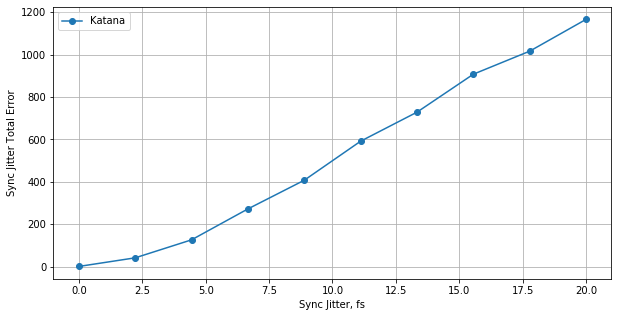

In [12]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.plot(tss[1],JRss2[1],"o-",label="Katana")
plt.xlabel("Sync Jitter, fs")
plt.ylabel("Sync Jitter Total Error")
plt.grid()
plt.legend()
#plt.xlim([0,50])
#plt.ylim([0,10000])
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Katana_SJvE.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101115_Katana_SJvE.png)

## To plot the Four-Fold coincidence rate and QBER against the Sync Jitter:

In [13]:
start_time = time.time()

sjs = []
FFs = []
FFes = []
QBERs = []

PulseWidths = [0.1,35]

n = 20

sj = []
FF = []
FFe = []
QBER = []
    
print("pulse width: ",0.1, "ps")
count=0
for s in np.linspace(0,25*1E-3,n):
    
    
    count +=1
    if int(100*count/n) == 25:
        print("25% complete")
    if int(100*count/n) == 50:
        print("50% complete")
    if int(100*count/n) == 75:
        print("75% complete")
    if int(100*count/n) == 100:
        print("100% complete")
    
    S1  = Source(pair_count=1E6,
                 frequency1_THz=193.4,
                 frequency2_THz=193.4, 
                 pulse_width_ps=0.1,
                 pulse_rate_MHz=2,
                 singles_fluorescence = 3000,
                 dark_counts = 1000,
                 afterpulsing = 0.15,
                 channel_isolation = 500,
                 DWDM_coupling_loss = 0.35)

    S2  = Source(pair_count=1E6,
                 frequency1_THz=193.4, 
                 frequency2_THz=193.4, 
                 pulse_width_ps=0.1,
                 pulse_rate_MHz=2,
                 singles_fluorescence = 3000,
                 dark_counts = 1000,
                 afterpulsing = 0.15,
                 channel_isolation = 500,
                 DWDM_coupling_loss = 0.35)

    LA1 = Link(Length=25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LR1 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LB2 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LR2 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    UA  = User(Link = LA1,
               Source = S1)

    UB  = User(Link = LB2,
               Source = S2)

    Sy  = Sync(Source1 = S1,
               Link1 = LR1,
               Source2 = S2,
               Link2 = LR2, 
               coincidence_window = 150E-12, 
               sync_jitter = s*1E-12)

    R   = Repeater(UA,UB,S1,S2,LA1,LR1,LB2,LR2,Sy)
    TP  = TwoPartyQKD(R)

    Sig, Err = TP.FourFold_full(minmax=1E-12)
    qber = TP.QBER_estimate(minmax=1E-12, preciseness=10000)

    sj.append(s)
    FF.append(Sig)
    FFe.append(Err)
    QBER.append(qber)

sjs.append(sj)
FFs.append(FF)
FFes.append(FFe)
QBERs.append(QBER)

sj = []
FF = []
FFe = []
QBER = []
print(time.time()-start_time, " seconds for section")
start_time = time.time()
print("pulse width: ",35, "ps")
count = 0
for s in np.linspace(0,10000*1E-3,n):
    #print(s)
    
    count +=1
    if int(100*count/n) == 25:
        print("25% complete")
    if int(100*count/n) == 50:
        print("50% complete")
    if int(100*count/n) == 75:
        print("75% complete")
    if int(100*count/n) == 100:
        print("100% complete")
    
    S1  = Source(pair_count=1E6,
                 frequency1_THz=193.4,
                 frequency2_THz=193.4, 
                 pulse_width_ps=35,
                 pulse_rate_MHz=2,
                 singles_fluorescence = 3000,
                 dark_counts = 1000,
                 afterpulsing = 0.15,
                 channel_isolation = 500,
                 DWDM_coupling_loss = 0.35)

    S2  = Source(pair_count=1E6,
                 frequency1_THz=193.4, 
                 frequency2_THz=193.4, 
                 pulse_width_ps=35,
                 pulse_rate_MHz=2,
                 singles_fluorescence = 3000,
                 dark_counts = 1000,
                 afterpulsing = 0.15,
                 channel_isolation = 500,
                 DWDM_coupling_loss = 0.35)

    LA1 = Link(Length=25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LR1 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LB2 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    LR2 = Link(Length = 25,
               Loss=0.3,
               ITU_bandwidth_Hz = 100*1E9,
               peak_wavelength_nm=1550.12,
               dispersion_coef=18,
               fibre_coupling_loss=0.08)

    UA  = User(Link = LA1,
               Source = S1)

    UB  = User(Link = LB2,
               Source = S2)

    Sy  = Sync(Source1 = S1,
               Link1 = LR1,
               Source2 = S2,
               Link2 = LR2, 
               coincidence_window = 150E-12, 
               sync_jitter = s*1E-12)

    R   = Repeater(UA,UB,S1,S2,LA1,LR1,LB2,LR2,Sy)
    TP  = TwoPartyQKD(R)

    Sig, Err = TP.FourFold_full(minmax=1E-9)
    qber = TP.QBER_estimate(minmax=1E-9, preciseness=10000)

    sj.append(s)
    FF.append(Sig)
    FFe.append(Err)
    QBER.append(qber)
    

sjs.append(sj)
FFs.append(FF)
FFes.append(FFe)
QBERs.append(QBER)

print(time.time()-start_time, " seconds for section")

pulse width:  0.1 ps
25% complete
50% complete
75% complete
100% complete
34.81818890571594  seconds for section
pulse width:  35 ps
25% complete
50% complete
75% complete
100% complete
32.58023715019226  seconds for section


### For the 100fs pulsed laser, the data is shown below.

The first plot shows how the QBER changes as the Sync Jitter increases.

The second plot shows how the Four-Fold Signal and Noise changes as a function of the Sync Jitter.

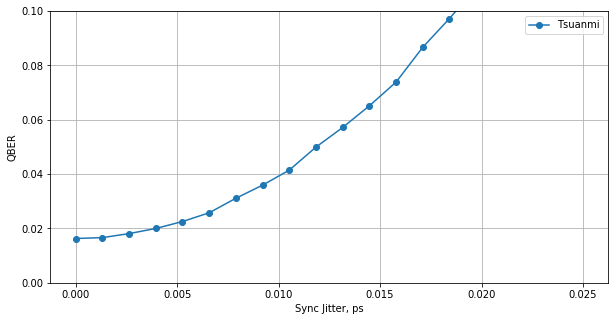

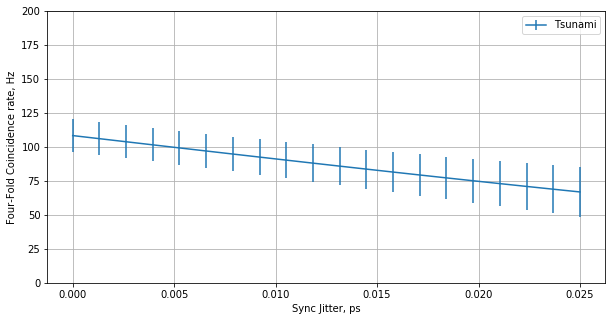

In [14]:
plt.figure(figsize=[10,5])
plt.plot(sjs[0],QBERs[0],"o-",label="Tsuanmi")
#plt.ylim([0,200])
plt.xlabel("Sync Jitter, ps")
plt.ylabel("QBER")
plt.ylim([0,0.1])
#plt.xlim([0,0.04])
plt.legend()
plt.grid()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Tsunami_SJvQBER.png"]))
plt.show()

time.sleep(1)
plt.figure(figsize=[10,5])
plt.errorbar(sjs[0],FFs[0],yerr=FFes[0],label="Tsunami")
plt.ylim([0,200])
plt.xlabel("Sync Jitter, ps")
plt.ylabel("Four-Fold Coincidence rate, Hz")
plt.legend()
plt.grid()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Tsunami_SJvFF.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101221_Tsunami_SJvQBER.png)

[//]:![title](FigsFromNotebook/2020_08_25_101221_Tsunami_SJvFF.png)

### For the 35ps pulsed laser, the data is shown below.

The first plot shows how the QBER changes as the Sync Jitter increases.

The second plot shows how the Four-Folt Signal and Noise changes as a function of the Sync Jitter.

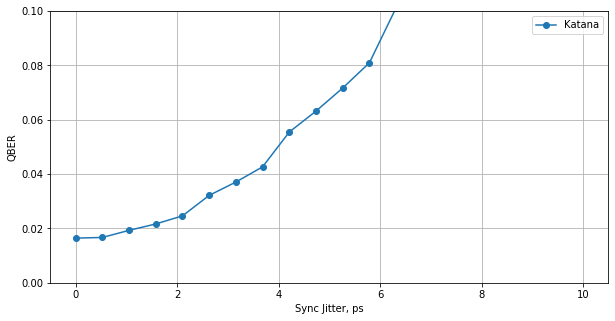

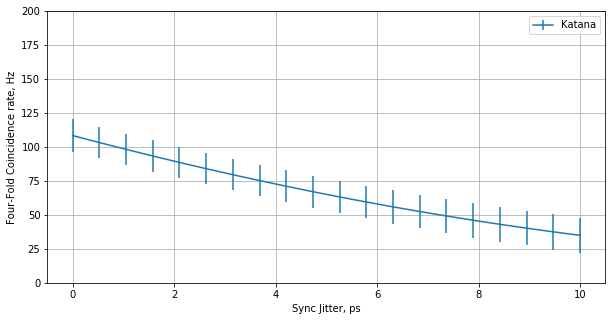

In [15]:
time.sleep(1)
plt.figure(figsize=[10,5])
plt.plot(sjs[1],QBERs[1],"o-",label="Katana")
#plt.ylim([0,200])
plt.xlabel("Sync Jitter, ps")
plt.ylabel("QBER")
plt.ylim([0,0.1])
#plt.xlim([0,10])
plt.legend()
plt.grid()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Katana_SJvQBER.png"]))
plt.show()

time.sleep(1)
plt.figure(figsize=[10,5])
plt.errorbar(sjs[1],FFs[1],yerr=FFes[1],label="Katana")
plt.ylim([0,200])
plt.xlabel("Sync Jitter, ps")
plt.ylabel("Four-Fold Coincidence rate, Hz")
plt.legend()
plt.grid()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_Katana_SJvFF.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_25_101221_Katana_SJvQBER.png)

[//]:![title](FigsFromNotebook/2020_08_25_101221_Katana_SJvFF.png)

# Plot of the Four-Fold rate vs the Singles rate

In [16]:
#lasers = {"Tsunami":[0.1,0.004E-12,1E-12],"Katana":[35,1E-12,1E-9]}
singles = []
FFs_s = []
FFes_s = []

n = 20
mins = 100 
maxs = 9E5

for item in lasers:
    single = []
    FF = []
    FFe = []
    
    print(item, "Laser")
    for s in np.linspace(mins,maxs,n):

        S1  = Source(pair_count=s,
                     frequency1_THz=193.4,
                     frequency2_THz=193.4, 
                     pulse_width_ps=lasers[item][0],
                     pulse_rate_MHz=2,
                     singles_fluorescence = 3000,
                     dark_counts = 1000,
                     afterpulsing = 0.15,
                     channel_isolation = 500,
                     DWDM_coupling_loss = 0.35)

        S2  = Source(pair_count=s,
                     frequency1_THz=193.4, 
                     frequency2_THz=193.4, 
                     pulse_width_ps=lasers[item][0],
                     pulse_rate_MHz=2,
                     singles_fluorescence = 3000,
                     dark_counts = 1000,
                     afterpulsing = 0.15,
                     channel_isolation = 500,
                     DWDM_coupling_loss = 0.35)

        LA1 = Link(Length=25,
                   Loss=0.3,
                   ITU_bandwidth_Hz = 100*1E9,
                   peak_wavelength_nm=1550.12,
                   dispersion_coef=18,
                   fibre_coupling_loss=0.08)

        LR1 = Link(Length = 25,
                   Loss=0.3,
                   ITU_bandwidth_Hz = 100*1E9,
                   peak_wavelength_nm=1550.12,
                   dispersion_coef=18,
                   fibre_coupling_loss=0.08)

        LB2 = Link(Length = 25,
                   Loss=0.3,
                   ITU_bandwidth_Hz = 100*1E9,
                   peak_wavelength_nm=1550.12,
                   dispersion_coef=18,
                   fibre_coupling_loss=0.08)

        LR2 = Link(Length = 25,
                   Loss=0.3,
                   ITU_bandwidth_Hz = 100*1E9,
                   peak_wavelength_nm=1550.12,
                   dispersion_coef=18,
                   fibre_coupling_loss=0.08)

        UA  = User(Link = LA1,
                   Source = S1)

        UB  = User(Link = LB2,
                   Source = S2)

        Sy  = Sync(Source1 = S1,
                   Link1 = LR1,
                   Source2 = S2,
                   Link2 = LR2, 
                   coincidence_window = 150E-12, 
                   sync_jitter = lasers[item][1])

        R   = Repeater(UA,UB,S1,S2,LA1,LR1,LB2,LR2,Sy)
        TP  = TwoPartyQKD(R)

        Sig, Err = TP.FourFold_full(minmax=lasers[item][2])

        single.append(UA.SinglesCounts()+UA.SignalCounts())
        FF.append(Sig)
        FFe.append(Err)

    singles.append(single)
    FFs_s.append(FF)
    FFes_s.append(FFe)

Tsunami Laser
Katana Laser


### The Four-Fold Coincidence Rate

The below shows how the rate of Four-Fold coincidences changes as the specified pair generation rate is changed.

Each Laser has a different heralding efficiency, as shown in figures 1, so for the same generation rate one laser has more total singles.

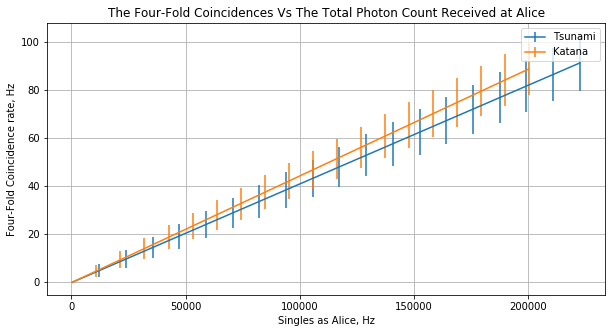

In [17]:
plt.figure(figsize=[10,5])
plt.errorbar(singles[0],FFs_s[0],yerr=FFes_s[0],label="Tsunami")
plt.errorbar(singles[1],FFs_s[1],yerr=FFes_s[1],label="Katana")
plt.title("The Four-Fold Coincidences Vs The Total Photon Count Received at Alice")
plt.xlabel("Singles as Alice, Hz")
plt.ylabel("Four-Fold Coincidence rate, Hz")
plt.legend()
plt.grid()
now = datetime.now()
dt_string = now.strftime("%Y_%m_%d_%H%M%S")
plt.savefig("".join(["FigsFromNotebook/New/",dt_string,"_FFvSingles.png"]))
plt.show()

Saved Figure Here

[//]:![title](FigsFromNotebook/2020_08_26_124732_FFvSingles.png)

<br>

## Conclusion

From this information it is likely that the Katana pump laser, with a 0.1ps pulse width, is unlikely to be usable.

This is because a synchronisation jitter of less than a ps is extremely unlikely to be acheived.

This leads to further work that will look at producing ps synchronisation jitter with the Tsunami pump laser.

This work will allow for a more definitive answer to the usability of either laser system.